In [20]:
import pandas as pd
import numpy as np
import seaborn as sn
import random as rd
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Data exploration

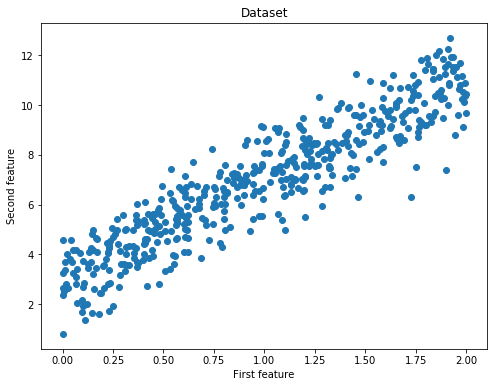

In [21]:
X = 2 * np.random.rand(500, 1)
y = 3 + 4 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show( )

In [22]:
y[: 4]

array([[5.85849525],
       [6.31358796],
       [7.42128112],
       [5.47088988]])

In [23]:
y[4]

array([11.8183449])

In [24]:
X.shape

(500, 1)

In [25]:
y.shape

(500, 1)

# Spliting the data into a train and test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('Shape X_train: {}' .format(X_train.shape))
print('Shape y_train: {}'.format(y_train.shape))
print('Shape X_test: {}'.format(X_test.shape))
print('Shape y_test: {}'.format(y_test.shape))

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [28]:
class LinearRegression:
    
    def __init__(self):
        pass
    # Cost function
    def cost_function(self, y_predict, y_true) :
        
        cost= (1/ y_true.shape[0])* np.sum((y_predict - y_true)**2)
        
        return cost
    
    # Learning algoritm
    def learning_algo(self, x, y, learning_rate, n_iterations) :
        
        m_samples, n_features = x.shape
        
        # Initialization
        self.theta = np.zeros((n_features,1))
        self.bias=0
        cost_final = np.zeros(n_iterations)
        
        # For finding the argmin of the cost function

        for i in range(n_iterations):

            # Hypothesis
            y_predict = np.dot(x, self.theta) + self.bias

            cost = self.cost_function(y_predict, y)
            cost_final[i] = cost

            # Gradient with respect to theta
            d_theta = (2/m_samples)* (np.dot(x.T,( y - y_predict)))

            #print(d_theta.shape)
            # Gradient with respect to theta
            d_bias = (2/m_samples)* np.sum( y - y_predict)

            # For updating theta and b
            self.theta = self.theta + learning_rate * d_theta
            self.bias  = self.bias  + learning_rate * d_bias

            
        
        return self.theta, self.bias, cost_final
    
    
    # Prediction step on the algorithm
    def predict (self, x):
        
        y_predict = np.dot(x, self.theta) + self.bias
        
        return y_predict     

In [29]:
linear_reg = LinearRegression()

In [30]:
theta, bias, costs = linear_reg.learning_algo(X_train, y_train, learning_rate = 0.01, n_iterations = 400)

In [31]:
theta.shape

(1, 1)

In [32]:
costs[:5]

array([56.04043593, 51.35988038, 47.07669158, 43.15713387, 39.57033571])

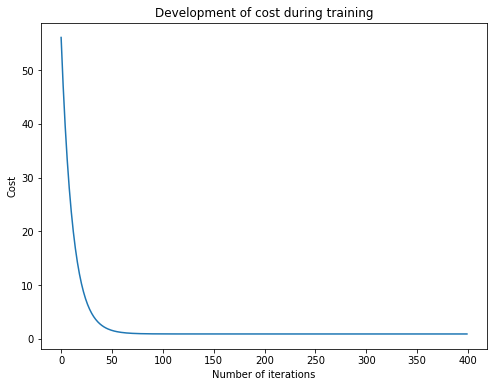

In [33]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(400), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [34]:
m_samples = X_train.shape[0]


y_predict_train = linear_reg.predict(X_train)

error_training =  (1 / m_samples) * np.sum((y_predict_train - y_train) ** 2)
print(f"Error on training set: {np.round(error_training, 4)}")

Error on training set: 0.9032


# Testing step of the algorithm

In [35]:
theta, bias, costs = linear_reg.learning_algo(X_test, y_test, learning_rate = 0.01, n_iterations = 400)

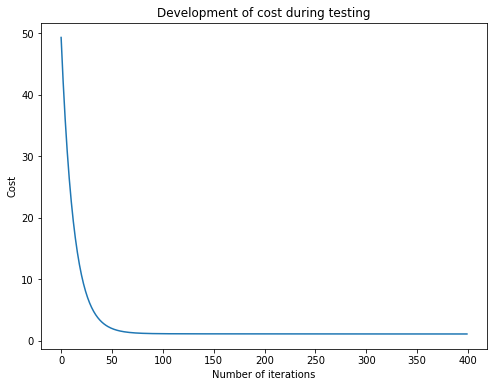

In [36]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(400), costs)
plt.title("Development of cost during testing")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [37]:
m_samples_test = X_test.shape[0]

y_predict_test = linear_reg.predict(X_test)

error_testing =  (1 / m_samples_test) * np.sum((y_predict_test - y_test) ** 2)
print(f"Error on testing set: {np.round(error_testing, 4)}")

Error on testing set: 1.0948


# Plotting of the Hypothesis

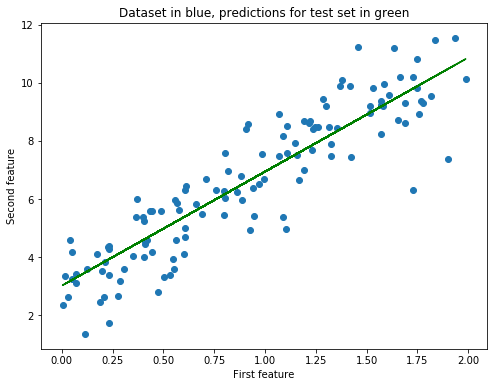

In [38]:
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in green")
plt.scatter(X_test, y_test)
y = [bias + np.dot(x, theta) for x in X_test]
plt.plot(X_test, y, color = 'green')
#plt.scatter(X_test, y_predict_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()